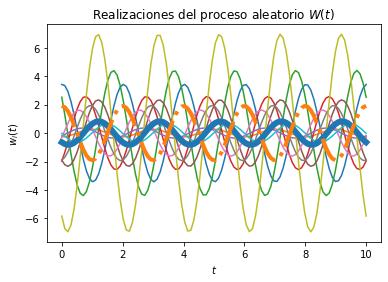

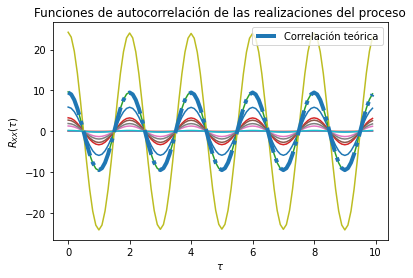

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias X y Y, que son iguales
vaX = stats.norm(0, np.sqrt(10))
vaY = stats.norm(0, np.sqrt(10))

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio W(t) con N realizaciones
N = 10
W_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (X y Y independientes)
for i in range(N):
	X = vaX.rvs()
	Y = vaY.rvs()
	w_t = X * np.cos(np.pi*t + Y)
	W_t[i,:] = w_t
	plt.plot(t, w_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(W_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 6/np.pi * np.cos(np.pi*t)
plt.plot(t, E, '-.', lw=4)


# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $W(t)$')
plt.xlabel('$t$')
plt.ylabel('$w_i(t)$')
plt.show()

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()


# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(W_t[n,:], np.roll(W_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 19/2 * np.cos(np.pi*taus)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show() 
